In [37]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import seaborn as sns

In [38]:
data = fetch_openml("mnist_784", version=1)

In [39]:
X = data["data"]
y = data["target"]

In [40]:
X.shape, y.shape

((70000, 784), (70000,))

In [41]:
X = X.to_numpy()

In [42]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(X)

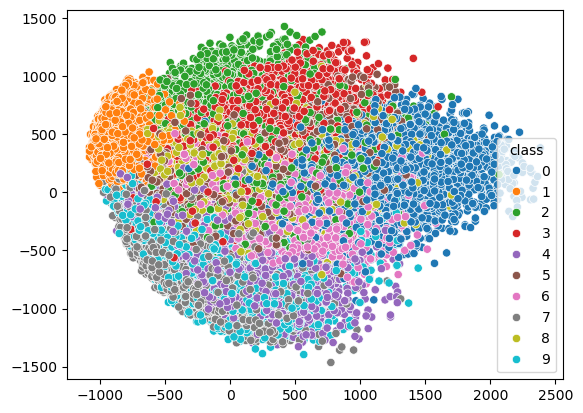

In [43]:
sns.scatterplot(x=pca_x[:, 0], y=pca_x[:, 1], hue=y);

In [44]:
# 9% variance lies along dim 0
# and 7% variance lies along dim 1
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

Okay, good, but how to chose number of dimensions?

In [45]:
# pca with 95% variance preservance ratio
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [46]:
# 784 -> 154 dimensions
X_reduced.shape

(70000, 154)

In [47]:
import numpy as np
np.sum(pca.explained_variance_ratio_)

0.9503499702078614

**Randomized PCA**
SGD version of PCA. Works drammatically faster

In [48]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)

It's actually slover (wtf blyat)

Incremental PCA: splits big dataset into chunks (minibatches) and processes them separately, so the dataset should not necessarily fit into memory

In [49]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for Xbatch in np.array_split(X, n_batches):
    inc_pca.partial_fit(Xbatch)
X_reduced = inc_pca.transform(X)

PCA also supports kernel tricks (like SVMs do)

In [53]:
from sklearn.decomposition import KernelPCA

In [55]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.4)
X_reduced = rbf_pca.fit_transform(X[:5000])